Importing the dependicies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and processing

In [3]:
df = pd.read_csv('./content/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Check for following details:

In [10]:
# 1. Null Values of Check the no of missing values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# 2. shape of data 

df.shape

(301, 9)

In [8]:
# 3. Checking Mean, Medain and Mode

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# 4. Getting info about the data sets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking he distribution of catagorical data

In [11]:
print(df.Fuel_Type.value_counts())

print(df.Seller_Type.value_counts())

print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encode the Catagorical data Column


Label Encoding

In [ ]:
# Encoding Fuel Type Column

df.replace({'Fuel_Type': {"Petrol": 0, "Diesel": 1, "CNG": 2}}, inplace= True)

# encoding Seller Type

df.replace({'Seller_Type' :{ 'Dealer': 0, 'Individual': 1 }}, inplace= True)

# encoding Transmission

df.replace({'Transmission' :{ 'Manual': 0, 'Automatic': 1 }}, inplace= True)

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
# Splitting the data into test and target 

x = df.drop(columns=['Car_Name', 'Selling_Price'], axis = 1)
y = df.Selling_Price

In [17]:
x, y

(     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
 0    2014           5.59       27000  ...            0             0      0
 1    2013           9.54       43000  ...            0             0      0
 2    2017           9.85        6900  ...            0             0      0
 3    2011           4.15        5200  ...            0             0      0
 4    2014           6.87       42450  ...            0             0      0
 ..    ...            ...         ...  ...          ...           ...    ...
 296  2016          11.60       33988  ...            0             0      0
 297  2015           5.90       60000  ...            0             0      0
 298  2009          11.00       87934  ...            0             0      0
 299  2017          12.50        9000  ...            0             0      0
 300  2016           5.90        5464  ...            0             0      0
 
 [301 rows x 7 columns], 0       3.35
 1       4.75
 2       7.25
 3      

In [18]:
# Spliting the data into test and train 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.1, random_state = 2)

Traning the Model

In [19]:
# 1. Linear Regression Model


lin_reg = LinearRegression()

In [20]:

# Fitting/traing the model with train data sets
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [21]:
# Prediction on training Data

training_data_prediction = lin_reg.predict(x_train)

In [22]:
# R Squared Error 

error_score = metrics.r2_score(y_train, training_data_prediction)

print(error_score ,": R Sqaureed Square . Should be minimum as possible")

0.8799451660493711 : R Sqaureed Square . Should be minimum as possible


Visualise the actual Prices and Predicted Price

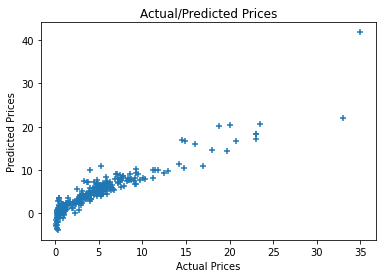

In [24]:
plt.scatter(y_train, training_data_prediction, marker='+')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual/Predicted Prices')
plt.show()

In [25]:
# Prediction on Test Datasets

test_data_prediction = lin_reg.predict(x_test)

In [27]:
# check r2 values

r2_square_value = metrics.r2_score(y_test, test_data_prediction)

print("Test R2 Score :", r2_square_value)

Test R2 Score : 0.8365766715027051


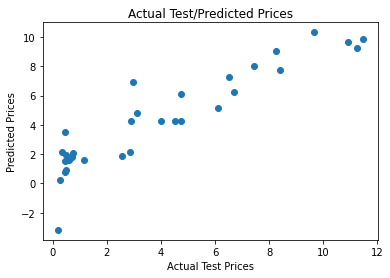

In [29]:
# Visualise the test and Predicted Graph

plt.scatter(y_test, test_data_prediction )
plt.xlabel('Actual Test Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Test/Predicted Prices')
plt.show()

Lasso Regrssion  - Test it

In [30]:
lasso_reg = Lasso()

In [31]:

# Fitting/traing the model with train data sets
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model Evaluation

In [32]:
# Prediction on training Data

training_data_prediction = lasso_reg.predict(x_train)

In [33]:
# R Squared Error 

error_score = metrics.r2_score(y_train, training_data_prediction)

print(error_score ,": R Sqaureed Square . Should be minimum as possible")

0.8427856123435794 : R Sqaureed Square . Should be minimum as possible


Visualise the actual Prices and Predicted Price

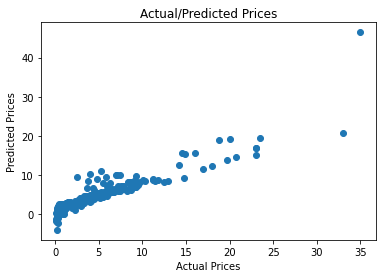

In [35]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual/Predicted Prices')
plt.show()

In [36]:
# Prediction on Test Datasets

test_data_prediction = lasso_reg.predict(x_test)

In [37]:
# check r2 values

r2_square_value = metrics.r2_score(y_test, test_data_prediction)

print("Test R2 Score :", r2_square_value)

Test R2 Score : 0.8709167941173195


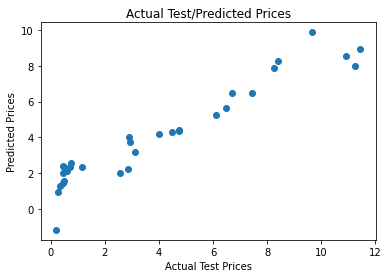

In [38]:
# Visualise the test and Predicted Graph

plt.scatter(y_test, test_data_prediction )
plt.xlabel('Actual Test Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Test/Predicted Prices')
plt.show()